## Análisis de los parámetros de la Gaussian en 2D

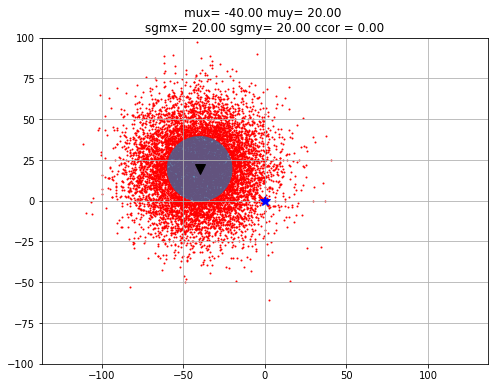

In [25]:
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definición de medias
mu_x = -40
mu_y = 20

# Definición de desviaciones estándar
sigma_x = 20.
sigma_y = 20.

# Definición del coeficiente de correlación
ccor = 0.

# Calculo de la covarianza
cov  = ccor * sigma_x * sigma_y

# Generador de una muestra con densidad de probabilidad de Gauss 2D 
z = stats.multivariate_normal.rvs(mean = [mu_x,mu_y], 
                                  cov = [[sigma_x**2, cov],[cov, sigma_y**2]],size = 10000)

# Calculo de los parámetros de la muestra
m_x = np.mean(z[:,0])
m_y = np.mean(z[:,1])

mat_cov = np.cov(z.T)

Sgm_X = np.sqrt(mat_cov[0,0])
Sgm_Y = np.sqrt(mat_cov[1,1])

Rho = mat_cov[0,1] / (Sgm_X * Sgm_Y)


# Cálculo de los elementos de la elipse de covarianza
if(Sgm_X == Sgm_Y):
    Alfa = np.pi /4
else:
    Alfa = 1/2 * np.arctan((2 * Rho * Sgm_X * Sgm_Y) / (Sgm_X**2 - Sgm_Y**2))
    
P1s = (1 - Rho**2) * Sgm_X**2 * Sgm_Y**2
P1s = P1s / (Sgm_Y**2 * np.cos(Alfa)**2 - 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.sin(Alfa)**2)

P2s = (1 - Rho**2)* Sgm_X**2 * Sgm_Y**2
P2s = P2s / (Sgm_Y**2 * np.sin(Alfa)**2 + 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.cos(Alfa)**2)

# Prepara la figura
fig = plt.figure(figsize = [8,6])
axs= fig.subplots()
axs.grid(True)
axs.axis('equal')
axs.set_xlim(-100,100)
axs.set_ylim(-100,100)

axs.set_title('mux= {:03.2f} muy= {:03.2f} \n sgmx= {:03.2f} sgmy= {:03.2f} ccor = {:03.2f} '
              .format(mu_x,mu_y, sigma_x, sigma_y,ccor))

axs.scatter(z[:,0],z[:,1], color = 'r', s=1)

# Grafica el origen del sistema
axs.plot(0,0,'*b',ms=10)

# Grafica el centro de la nube de puntos
axs.plot(m_x,m_y,'vk',ms = 10)  

# Genera la elipse de covarianza
ellipse = Ellipse((m_x,m_y), width = 2*np.sqrt(P1s), height = 2*np.sqrt(P2s), angle = Alfa * 180/np.pi, alpha=0.7)

# Grafica la elipses
axs.add_artist(ellipse)

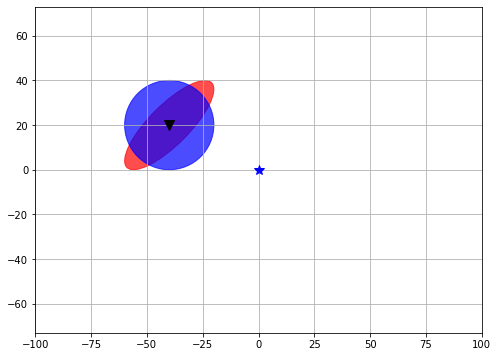

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Ellipse
from matplotlib.patches import Ellipse

m_x = -40. 
m_y = 20. 

Sgm_X =20
Sgm_Y =20

# Fig1. Scatter plot de los puntos y elipse de covarianze
fig = plt.figure(figsize = [8,6])
axs= fig.subplots()

axs.plot(0,0,'*b',ms=10)
axs.plot(m_x,m_y,'vk',ms = 10)
axs.grid(True)
axs.axis('equal')
axs.set_xlim(-100,100)
axs.set_ylim(-100,100)

Rho = 0.8                    
if(Sgm_X == Sgm_Y):
    Alfa = np.pi /4
else:
    Alfa = 1/2 * np.arctan((2 * Rho * Sgm_X * Sgm_Y) / (Sgm_X**2 - Sgm_Y**2))
    
P1s = (1 - Rho**2) * Sgm_X**2 * Sgm_Y**2
P1s = P1s / (Sgm_Y**2 * np.cos(Alfa)**2 - 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.sin(Alfa)**2)
P2s = (1 - Rho**2)* Sgm_X**2 * Sgm_Y**2
P2s = P2s / (Sgm_Y**2 * np.sin(Alfa)**2 + 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.cos(Alfa)**2)

ellipse = Ellipse((m_x,m_y), width = 2*np.sqrt(P1s), height = 2*np.sqrt(P2s), angle = Alfa * 180/np.pi, alpha=0.7, color ='r')
axs.add_artist(ellipse)

Rho = 0.                    
if(Sgm_X == Sgm_Y):
    Alfa = np.pi/4
else:
    Alfa = 1/2 * np.arctan((2 * Rho * Sgm_X * Sgm_Y) / (Sgm_X**2 - Sgm_Y**2))

P1s = (1 - Rho**2) * Sgm_X**2 * Sgm_Y**2
P1s = P1s / (Sgm_Y**2 * np.cos(Alfa)**2 - 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.sin(Alfa)**2)
P2s = (1 - Rho**2)* Sgm_X**2 * Sgm_Y**2
P2s = P2s / (Sgm_Y**2 * np.sin(Alfa)**2 + 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.cos(Alfa)**2)

ellipse = Ellipse((m_x,m_y), width = 2*np.sqrt(P1s), height = 2*np.sqrt(P2s), angle = Alfa * 180/np.pi, alpha=0.7, color = 'b')
axs.add_artist(ellipse)

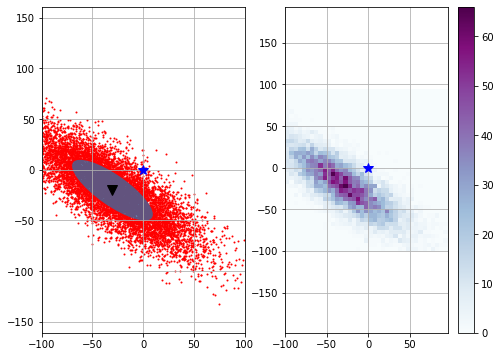

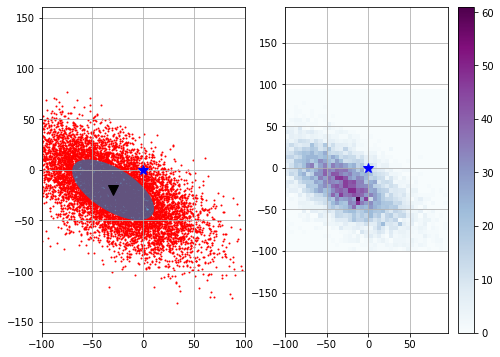

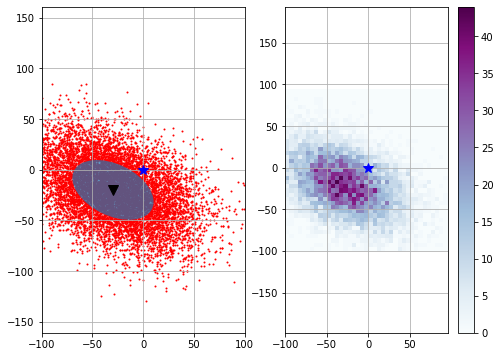

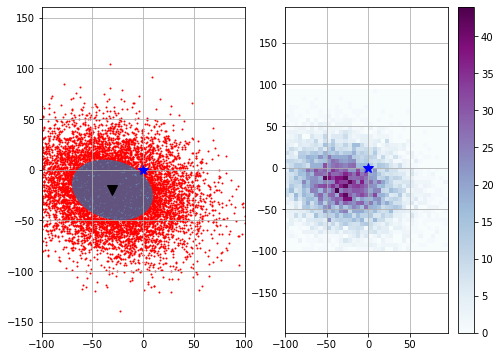

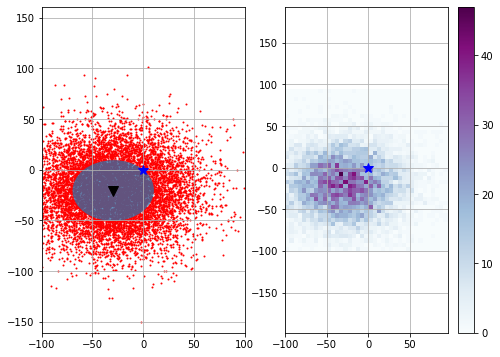

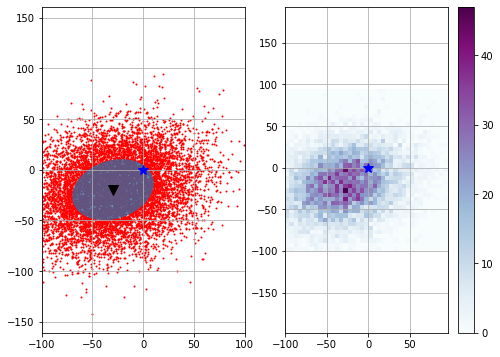

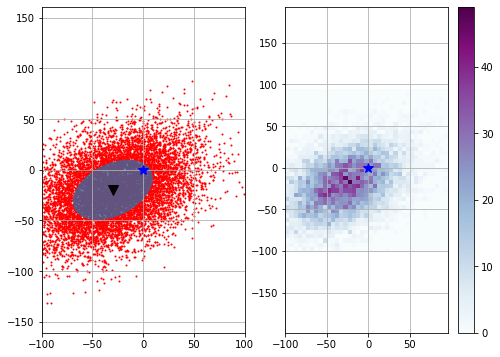

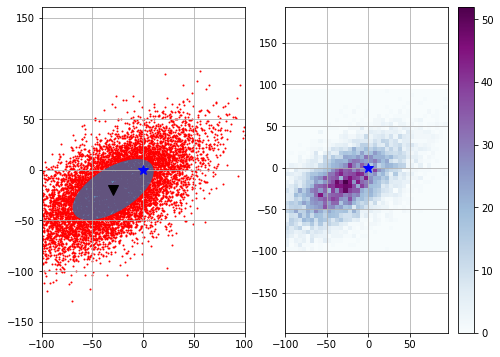

In [26]:
from matplotlib.patches import Ellipse
#import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse

def EllipseComp(z,axs):
    
    mat_cov = np.cov(z.T)
    m_x = np.mean(z[:,0])
    m_y = np.mean(z[:,1])
    
    Sgm_X = np.sqrt(mat_cov[0,0])
    Sgm_Y = np.sqrt(mat_cov[1,1])
    
    Rho = mat_cov[0,1] / (Sgm_X * Sgm_Y)
    
    if(Sgm_X == Sgm_Y):
        Alfa = np.pi /4
    else:
        Alfa = 1/2 * np.arctan((2 * Rho * Sgm_X * Sgm_Y) / (Sgm_X**2 - Sgm_Y**2))
    
    P1s = (1 - Rho**2) * Sgm_X**2 * Sgm_Y**2
    P1s = P1s / (Sgm_Y**2 * np.cos(Alfa)**2 - 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.sin(Alfa)**2)
    P2s = (1 - Rho**2)* Sgm_X**2 * Sgm_Y**2
    P2s = P2s / (Sgm_Y**2 * np.sin(Alfa)**2 + 2 * Rho*Sgm_X*Sgm_Y * np.sin(Alfa) * np.cos(Alfa) + Sgm_X**2 * np.cos(Alfa)**2)
    
    ellipse = Ellipse((m_x,m_y), width = 2*np.sqrt(P1s), height = 2*np.sqrt(P2s), angle = Alfa * 180/np.pi, alpha=0.7)
    axs.add_artist(ellipse)
    return

mu_x, sigma_x = -30, 40
mu_y, sigma_y = -20, 30    

for ccor in np.arange(-.8,.8,.2):
    cov  = ccor * sigma_x * sigma_y
    z = stats.multivariate_normal.rvs(mean = [mu_x,mu_y], 
                                      cov = [[sigma_x**2, cov],[cov, sigma_y**2]],size = 10000)
    
    # Fig1. Scatter plot de los puntos y elipse de covarianze
    fig = plt.figure(figsize = [8,6])
    axs,axs2= fig.subplots(1,2)
    
    axs.axis('equal')
    axs2.axis('equal')
    
    axs.scatter(z[:,0],z[:,1], color = 'r', s=1)
    axs.grid(True)
    axs.set_xlim(-100,100)
    axs.set_ylim(-100,100)
    
    axs.plot(0,0,'*b',ms=10)
    #axs.plot(np.mean(z[:,0]),np.mean(z[:,1]), 'vk',ms=10)
    axs.plot(z.mean(axis = 0)[0],z.mean(axis = 0)[1],'vk',ms = 10)   
    EllipseComp(z,axs)
    
    # Fig2. Histograma en 2D    
    counts, xedges, yedges, im  = axs2.hist2d(z[:,0],z[:,1],bins = [np.arange(-100,100,5), np.arange(-100,100,5)],
                                              cmin = 0, cmax = 100,cmap=plt.cm.BuPu)
    axs2.plot(0,0,'*b',ms=10)
    axs2.grid(True)
    fig.colorbar(im, ax = axs2)
        

In [15]:
np.arctan(np.inf)

1.5707963267948966

In [16]:
np.pi /2

1.5707963267948966